In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df_TiTanic = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_TiTanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_TiTanic_data = df_TiTanic[['Survived','Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df_TiTanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [4]:
df_TiTanic_data = df_TiTanic_data.dropna()
df_TiTanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 상관관계 확인

- 목표 변수 : 'Survived'
- 설명변수 :
    - 'Pclass' :
    - 'Name' :
    - 'Sex' :
    - 'Age' :
    - 'SibSp' :
    - 'Parch' :
    - 'Ticket' :
    - 'Fare' :
    - 'Embarked' :
  

<Axes: xlabel='Survived', ylabel='count'>

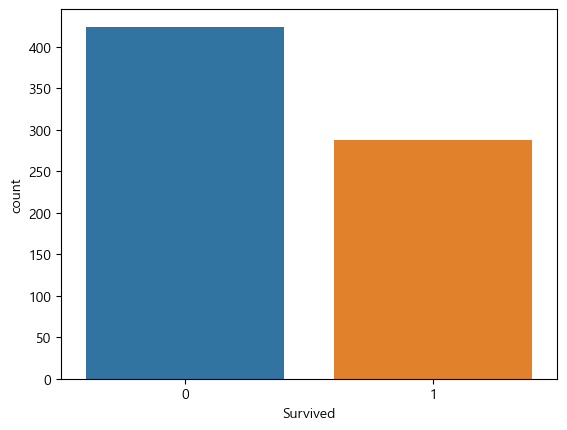

In [5]:
### 데이터 타입과 분포
## 목표 변수
sns.countplot(data=df_TiTanic_data, x='Survived') 

In [6]:
df_TiTanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [7]:
#object 변환 대상 : 'Survived','Pclass','SibSp', 'Parch'
df_TiTanic_data[['Survived','Pclass','SibSp', 'Parch']] = df_TiTanic_data[['Survived','Pclass','SibSp', 'Parch']].astype(object)
df_TiTanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    object 
 1   Pclass    712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    object 
 5   Parch     712 non-null    object 
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), object(6)
memory usage: 50.1+ KB


In [8]:
df_TiTanic_data = df_TiTanic_data.dropna()
df_TiTanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
## x : 범주형 / y : 범주형

In [20]:
data_list= df_TiTanic_data.describe(include=object).drop(columns=['Survived']).columns.to_list()
data_list

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

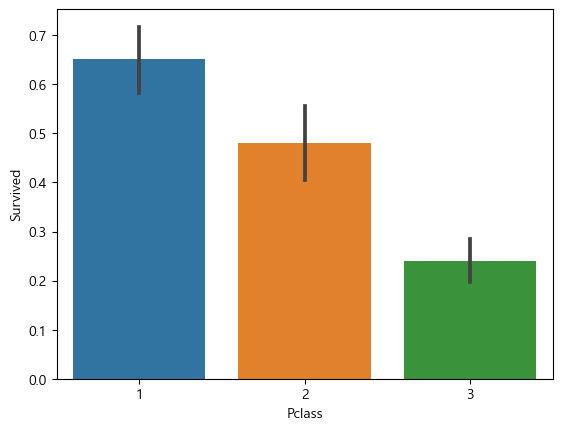

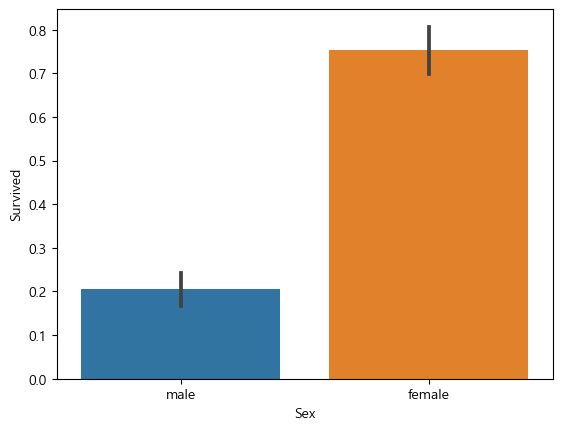

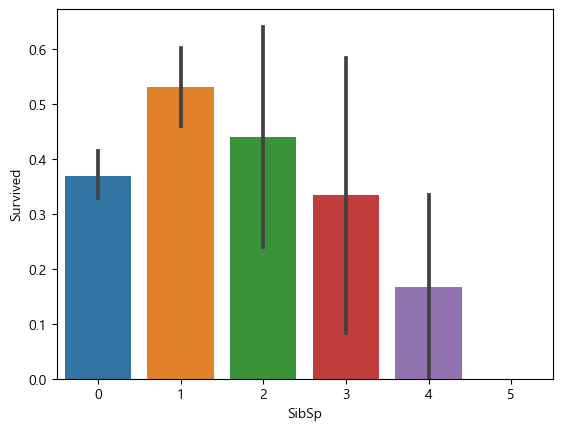

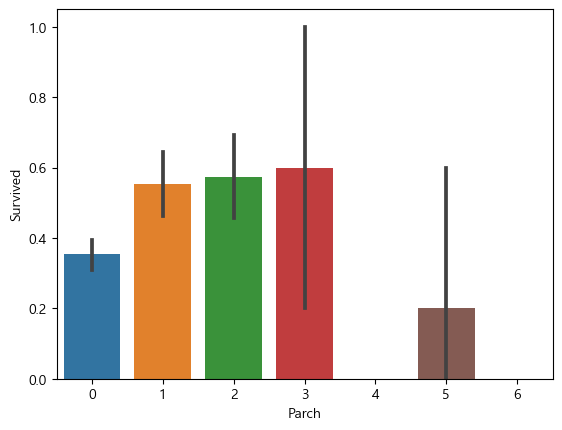

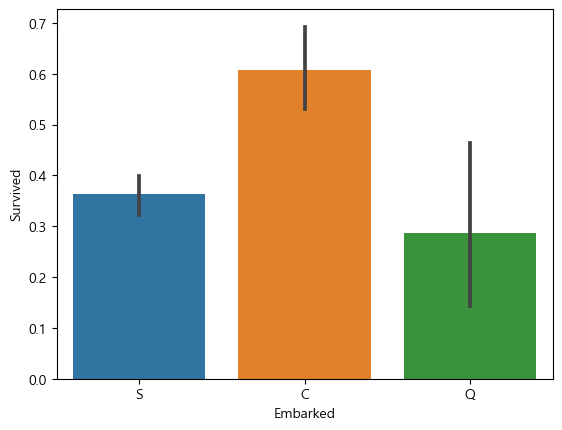

In [24]:
for item in data_list : 
    sns.barplot(data = df_TiTanic_data, x=item, y='Survived')
    plt.show()

In [11]:
df_TiTanic_data.describe()

,Age,Fare
count,712.000000,712.000000
mean,29.642093,34.567251
std,14.492933,52.938648
min,0.420000,0.000000
25%,20.000000,8.050000
50%,28.000000,15.645850
75%,38.000000,33.000000
max,80.000000,512.329200


In [15]:
## x : 연속형 / y : 범주형

In [31]:
df_TiTanic_data_int = df_TiTanic_data.describe().columns.to_list()


['Age', 'Fare']

In [37]:
Q1_Age = df_TiTanic_data['Age'].describe()['25%']
Q3_Age = df_TiTanic_data['Age'].describe()['75%']
IQR_Age = Q3_Age - Q1_Age #체중 연령
Q1_Age, Q3_Age, IQR_Age

(20.0, 38.0, 18.0)

In [38]:
bound_up_Age = Q3_Age + IQR_Age * 1.5
bound_down_Age = Q1_Age - IQR_Age * 1.5
bound_up_Age, bound_down_Age

(65.0, -7.0)

In [39]:
## filter
condition_Age = (df_TiTanic_data['Age'] <= bound_up_Age) & (df_TiTanic_data['Age'] >= bound_down_Age) # 긍정 조건 변환
condition_Age

0      True
1      True
2      True
3      True
4      True
       ... 
885    True
886    True
887    True
889    True
890    True
Name: Age, Length: 712, dtype: bool

In [40]:
df_TiTanic_data_condtion_Age = df_TiTanic_data[condition_Age]

<Axes: xlabel='Survived', ylabel='Age'>

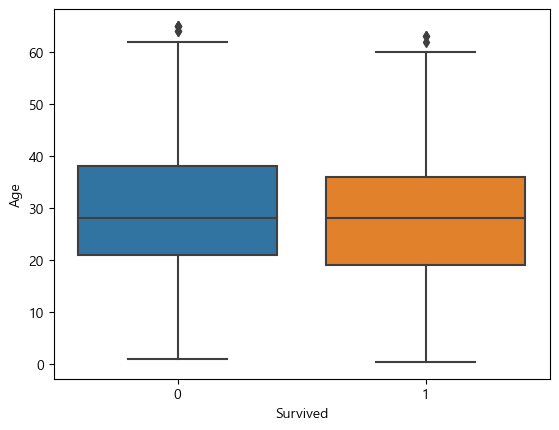

In [45]:
sns.boxplot(data=df_TiTanic_data_condtion_Age, y='Age', x='Survived')

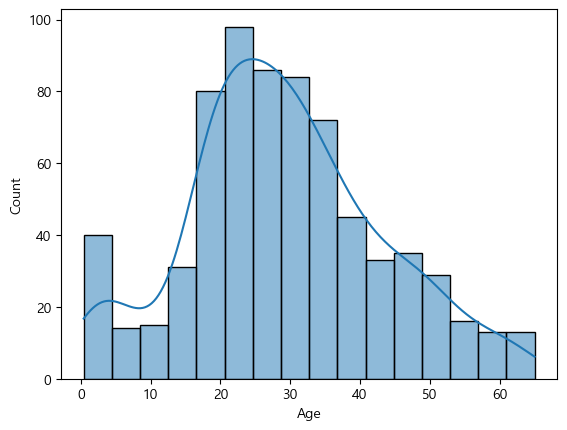

In [43]:
sns.histplot(data=df_TiTanic_data_condtion_Age, x='Age', kde=True)
plt.show()


In [47]:
Q1_Fare = df_TiTanic_data['Fare'].describe()['25%']
Q3_Fare = df_TiTanic_data['Fare'].describe()['75%']
IQR_Fare = Q3_Fare - Q1_Fare #체중 연령
Q1_Fare, Q3_Fare, IQR_Fare

(8.05, 33.0, 24.95)

In [48]:
bound_up_Fare = Q3_Fare + IQR_Fare * 1.5
bound_down_Fare = Q1_Fare - IQR_Fare * 1.5
bound_up_Fare, bound_down_Fare

(70.425, -7.0)

In [49]:
## filter
condition_Fare = (df_TiTanic_data['Fare'] <= bound_up_Fare) & (df_TiTanic_data['Fare'] >= bound_down_Fare) # 긍정 조건 변환
condition_Fare

0       True
1      False
2       True
3       True
4       True
       ...  
885     True
886     True
887     True
889     True
890     True
Name: Fare, Length: 712, dtype: bool

In [50]:
df_TiTanic_data_condtion_Fare = df_TiTanic_data[condition_Fare]

<Axes: xlabel='Survived', ylabel='Fare'>

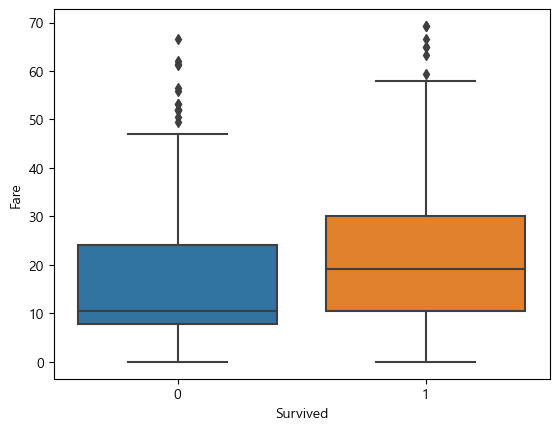

In [51]:
sns.boxplot(data=df_TiTanic_data_condtion_Fare, y='Fare', x='Survived')

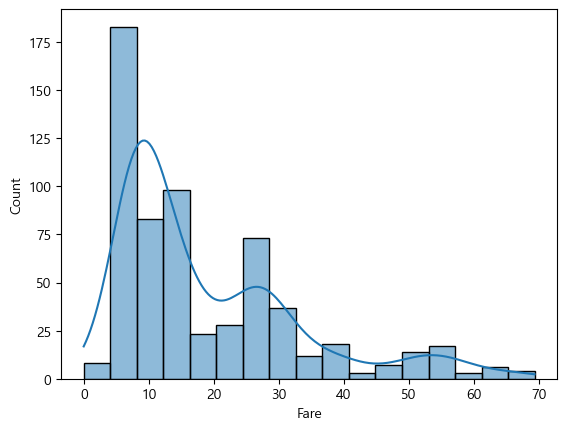

In [55]:
sns.histplot(data=df_TiTanic_data_condtion_Fare, x='Fare', kde=True)
plt.show()